# Exploración de datos del dataset sales_predictions.csv

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-01-12

**Fecha de actualización:** 2022-01-12

In [1]:
#Importar pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
filename = "data/sales_predictions.csv"
sp_df = pd.read_csv(filename)

In [3]:
#Ver información global del dataset
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Ver los diez primeros registros del dataset en formato de tabla
sp_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


### Ver los valores únicos de las variables categóricas

In [5]:
# De acurdo a los datos: ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']
# aparentemente 'Low Fat','low fat' y 'LF' se refienren a la misma variable igualmente
# 'Regular' y 'reg'
print(sp_df['Item_Fat_Content'].unique())
filtroLowFat = (sp_df['Item_Fat_Content'] == 'low fat') | (sp_df['Item_Fat_Content'] == 'LF')
sp_df.loc[filtroLowFat , 'Item_Fat_Content'] = 'Low Fat'

filtroRegular = (sp_df['Item_Fat_Content'] == 'reg')
sp_df.loc[filtroRegular , 'Item_Fat_Content'] = 'Regular'

print(sp_df['Item_Fat_Content'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Low Fat' 'Regular']


In [6]:
sp_df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [7]:
sp_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
sp_df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
sp_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
sp_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

### Valores de tendencia central de cada columna

In [11]:
sp_df.max(numeric_only=True)

Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [12]:
sp_df.min(numeric_only=True)

Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64

In [13]:
sp_df.mean(numeric_only=True)

Item_Weight                    12.857645
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [14]:
sp_df.std(numeric_only=True)

Item_Weight                     4.643456
Item_Visibility                 0.051598
Item_MRP                       62.275067
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
dtype: float64

In [15]:
sp_df.var(numeric_only=True)

Item_Weight                  2.156169e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

In [16]:
sp_df.median(numeric_only=True)

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [17]:
#Muestra los principales valores estadísticos
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Datos faltantes

In [18]:
#Calcular el porcentaje de datos faltantes de cada columna
sp_df.isna().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

**Rellenando datos con la media(Caso 1) y moda(Caso 2)**

In [19]:
# Copiar DataFrame por valor y no referencia como ocurriría si solo se escribe
# sp_df1 = sp_df
sp_df1 = sp_df.copy()

# Caso 1
# Rellenar los valores nan de Item_Weight con la media de los valores de Item_Weigth
# La desventaja de esta estrategia radica en se tratan a los datos como columna y
# No toma en cuenta la corellación que podría existir con el registro(fila) 
sp_df1['Item_Weight']=sp_df1['Item_Weight'].fillna(sp_df1.Item_Weight.mean())

# Caso 2
# Para el campo Outlet_Size se utiliza una estrategia similar a la usada para Item_Weight
# con la diferencia de que para este caso se calcula la moda del conjunto de datos y no la 
# media por tratarse de una columna categórica.
# Se deja comentado debido a que considero que la estrategia siguiente mantiene tendencias
# similares a las del conjunto de datos.
#modaOutletSize = sp_df1.Outlet_Size.mode()
#sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(modaOutletSize.to_string())


# Caso 3 
# Llenado de acuerdo al porcentaje de participacón de cada Categoría en el conjunto de datos
# Ej 'Uno': 0.3, 'Dos': 0.4, 'Tres':0.4
# En este caso, al 30% de los datos faltantes se establecera el valor 'Uno', al 40% el valor de 'Dos'
# y 40% el valor de 'Tres'
sp_df1_1=sp_df1.copy()
modaOutletSize = sp_df1_1.Outlet_Size.mode()
sp_df1_1['Outlet_Size']=sp_df1_1['Outlet_Size'].fillna(modaOutletSize[0])


nNaOutletSize = sp_df1[['Outlet_Size']].isna().sum().Outlet_Size
categoriasNa = round(sp_df1[['Outlet_Size','Item_Weight']].groupby('Outlet_Size').count()/sp_df1['Outlet_Size'].count() * nNaOutletSize)
categoriasNa = categoriasNa.astype(int)

#categoriasNa(columns = ['Item_Weight':'cantidad'])
for index,val in categoriasNa['Item_Weight'].items():
    sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(index,limit=val)
sp_df1['Outlet_Size']=sp_df1['Outlet_Size'].fillna(index)

sp_df1['Outlet_Size']


0       Medium
1       Medium
2       Medium
3         High
4         High
         ...  
8518      High
8519     Small
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

<AxesSubplot:title={'center':'Outlet Size con rellenado con moda'}, ylabel='Outlet_Size'>

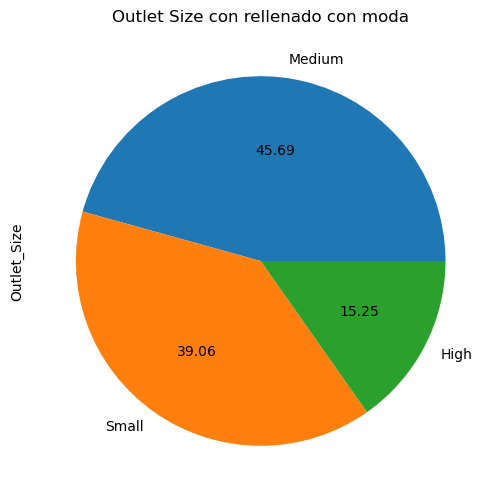

In [20]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos original
# Omitiendo los valores faltantes
plt.style.use('default')
sp_df['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con moda')

<AxesSubplot:title={'center':'Outlet Size con rellenado con moda'}, ylabel='Outlet_Size'>

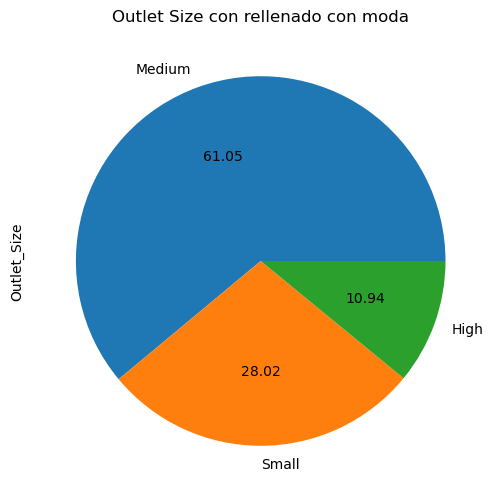

In [21]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos
# que se rellenó los datos faltantes con la moda
sp_df1_1['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con moda')

<AxesSubplot:title={'center':'Outlet Size con rellenado con porcentaje de participación'}, ylabel='Outlet_Size'>

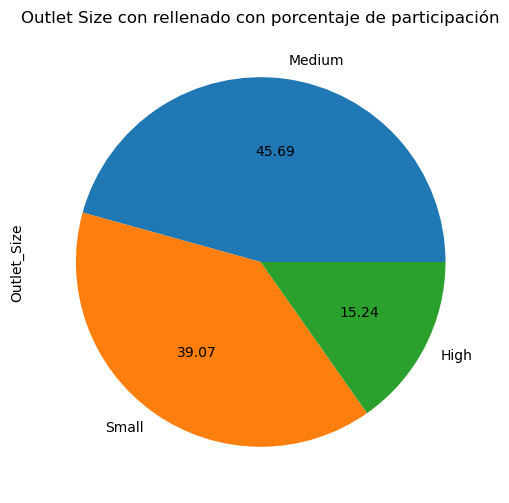

In [22]:
# Gráfico de pastel del porcentaje de participación de cada 'Outlet_Size' del conjunto de datos
# que se rellenó de acuerdo al porcentaje de participación de cada 'Outlet_Size'
# con lo cual las tendencias, prácticamente, se mantienen similares a las observadas
# en el conjunto de datos original, por lo que se opta por esta estrategia de reemplazo
sp_df1['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Outlet Size con rellenado con porcentaje de participación')

**Verificación de datos faltantes luego de aplicar el método .fillna()**

In [23]:
sp_df1.isna().mean()*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [24]:
sp_df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Gráficos

In [25]:
cumsumOutletYear = sp_df.groupby('Outlet_Establishment_Year').nunique('Outlet_Identifier')['Outlet_Identifier'].cumsum()
sp_df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

## Gráfico de la cantidad de locales existentes cada año
Este gráfico corresponde a la suma acumulada de establecimientos abiertos cada año.
Suponiendo ninguno se ha cerrado, la suma acumulada corresponderá a los locales existente en un año determinado.

Text(0, 0.5, 'Locales existentes')

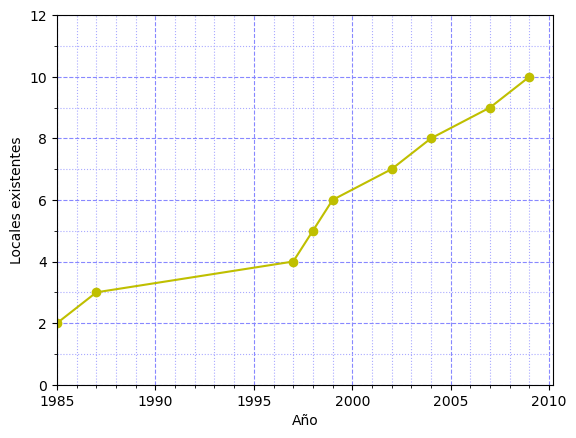

In [26]:
# Importar librerias para crear subgrids
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Crear subplot
fig, ax = plt.subplots(1,1)

#Graficar en color amarillo y marcador 'o'
ax.plot(cumsumOutletYear,marker='o',c="y")

#Establecer límites en x & y
ax.set_xlim(left=1985)
ax.set_ylim(bottom=0, top=12)

# Establecer líneas mayores de la grilla
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))

#Establecer líneas menores de la grilla
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))

# Dibujar grilla, establcer colores y estilo de línea
ax.grid(which='major', color='#88F', linestyle='--')
ax.grid(which='minor', color='#AAF', linestyle=':')

ax.set_xlabel('Año')
ax.set_ylabel('Locales existentes')


In [27]:
sp_df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [28]:
sumaVentas = sp_df1['Item_Outlet_Sales'].sum() # Obtiene la suma total de ventas de producto en el establecimiento
ventasOutletSize = round(sp_df1.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum(),2) # Suma de total de ventas por tamaño de establecimiento  
ventasOutletSize

Outlet_Size
High      2832051.54
Medium    9536050.33
Small     6223023.54
Name: Item_Outlet_Sales, dtype: float64

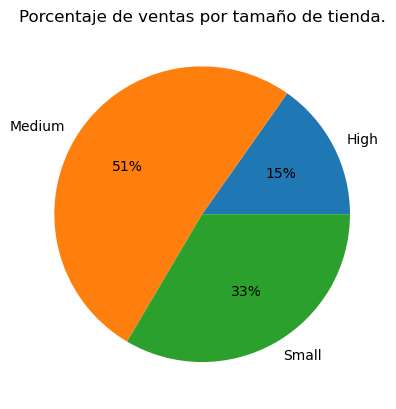

In [29]:
fig, ax = plt.subplots(1,1) # Crear un subplot
ax.set_title('Porcentaje de ventas por tamaño de tienda.') # Establecer título
ax.pie(ventasOutletSize, labels=ventasOutletSize.index, autopct='%1.0f%%'); # Graficar

## Gráfico de ventas de acuerdo al tipo de ubicación del establecimiento y el contenido de grasa del producto.


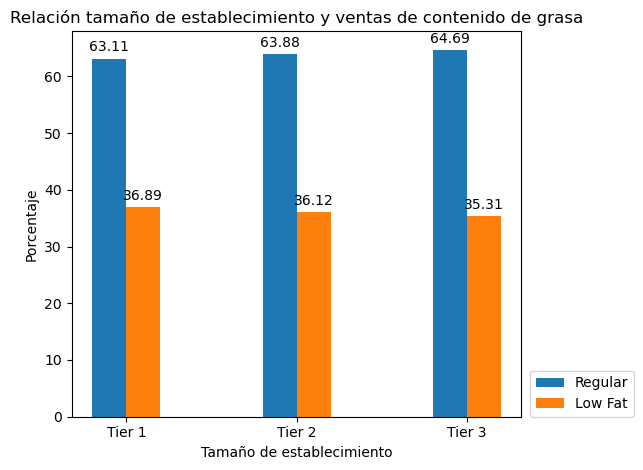

In [30]:
# Se obtiene el total de ventas agrupado por la columna 'Outlet_Location_Type' y el resultado 
# se vuelve a convertir a DataFrame
ventasOutletLocation = sp_df1.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum().to_frame()
ventasOutletLocation['Outlet_Location_Type']=ventasOutletLocation.index # Se crea una nueva columna y se asigna el valor del índice
ventasOutletLocation.reset_index(drop=True, inplace=True) # Se elimina el índice

# Se obtiene el total de ventas agrupado por 'Outlet_Location_Type' e 'Item_Fat_Content'
ventasOutletLocationFat = round(sp_df1.groupby(['Outlet_Location_Type','Item_Fat_Content'])['Item_Outlet_Sales'].sum().sort_index(),2)

# Se convierte a DataFrame y se desapila la agrupación
ventasOutletLocationFat = ventasOutletLocationFat.to_frame().unstack()['Item_Outlet_Sales']
ventasOutletLocationFat['Outlet_Location_Type']=ventasOutletLocationFat.index # Se crea una nueva columna y se asigna el valor del índice
ventasOutletLocationFat.reset_index(drop=True, inplace=True) # Se elimina el índice

# Se combinan los dataframes ventasOutletLocationFat y ventasOutletLocation teniendo como llave a la columna 'Outlet_Location_Type'
ventasOutletLocationFat = ventasOutletLocationFat.join(ventasOutletLocation.set_index('Outlet_Location_Type'),on='Outlet_Location_Type')

# Se obtiene el valor porcentual para las columnas 'Low Fat' y 'Regular' dividiendo para el total de ventas en cada 'Outlet_Location_Type'
# y multiplicándolo por 100
ventasOutletLocationFat['Low Fat']=round(100*ventasOutletLocationFat['Low Fat']/ventasOutletLocationFat['Item_Outlet_Sales'],2)
ventasOutletLocationFat['Regular']=round(100*ventasOutletLocationFat['Regular']/ventasOutletLocationFat['Item_Outlet_Sales'],2)

# Se definen los labels para el grpafico
labels = ventasOutletLocationFat['Outlet_Location_Type']

#Se obtienen los valores para el gráfico 
lowFat = ventasOutletLocationFat['Low Fat'].values
regular = ventasOutletLocationFat['Regular'].values

x = np.arange(len(labels)) # Se define un arreglo numpy de longitud igual a labels
width = 0.2 #Ancho de cada barra

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lowFat, width, label='Regular')
rects2 = ax.bar(x + width/2, regular, width, label='Low Fat')

ax.set_ylabel('Porcentaje')
ax.set_xlabel('Tamaño de establecimiento')
ax.set_title('Relación tamaño de establecimiento y ventas de contenido de grasa')


# Establecer valores para xticks(Tier 1, Tier 2, Tier 2) 
ax.set_xticks(x) # Asignar etiquetas en el eje x (sintaxis matplotlib 3.5) 
def format_fn(tick_val, tick_pos):
    return labels[int(tick_val)]
ax.xaxis.set_major_formatter(format_fn)

ax.legend(loc=(1.02,0))

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

In [31]:
sp_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
df3 = sp_df.copy();
df3['Outlet_Size'] = df3['Outlet_Size'].fillna('No establecido')
df_oi_os = df3.groupby(['Outlet_Identifier','Outlet_Size']).count()['Outlet_Type'].to_frame()
df_oi_os.groupby(['Outlet_Size']).count()

,Outlet_Type
Outlet_Size,
High,1
Medium,3
No establecido,3
Small,3


## Gráfico porcentual de ventas por sucursal

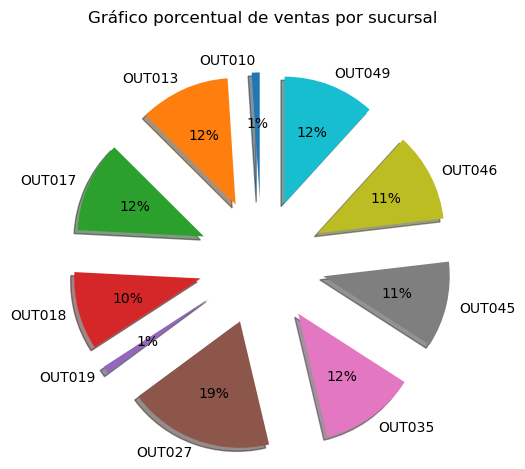

In [33]:
# Obtener el total de ventas por sucursal
df_oi_os = df3.groupby(['Outlet_Identifier']).sum()['Item_Outlet_Sales'].to_frame()
df_oi_os = round(df_oi_os['Item_Outlet_Sales'],2)


fig, ax = plt.subplots(1,1) # Crear un subplot
fig.suptitle('Gráfico porcentual de ventas por sucursal') # Establecer título superior

# Lista de dimnsion 'len(df_oi_os.index)' para separar (explode) las rebanadas del gráfico
# en este caso 0.5
explode= [0.5]*len(df_oi_os.index) 

# Graficar 
ax.pie(labels=df_oi_os.index, explode=explode, x=df_oi_os.values,autopct='%1.0f%%',shadow=True, startangle=90);
fig.tight_layout() # Ajustar la figura
